<a href="https://colab.research.google.com/github/shezta/Case-Study-02-Data-Mining-UIN-Ganjil-2022-Kelompok-8/blob/main/Kodingan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Package

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from datetime import datetime

#Melakukan Pemanggilan Data csv

In [ ]:
try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfT.shape

((1024, 26), (998, 26), (128, 26))

Mengetahui jenis variabel

In [ ]:
dfJ.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

Mengetahui Jumlah Baris dan Kolom pada Data

In [ ]:
B, K = dfJ.shape
print('Baris = ', B, ', Kolom = ', K)

Baris =  1024 , Kolom =  26


Mengetahui Tipe Variabel

In [ ]:
dfJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   121 non-null    object 
 1   LT           121 non-null    float64
 2   LB           121 non-null    float64
 3   KT           121 non-null    float64
 4   KM           121 non-null    float64
 5   garasi       44 non-null     float64
 6   carport      90 non-null     float64
 7   lokasi       121 non-null    object 
 8   sertifikat   119 non-null    object 
 9   listrik      120 non-null    float64
 10  hadap        36 non-null     object 
 11  harga        121 non-null    float64
 12  URL          121 non-null    object 
 13  deskripsi    112 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unname

Menghapus variabel pada kolom yang tidak diperlukan.

In [ ]:
data_baru = dfJ.drop(columns = ['URL','deskripsi','hadap','Unnamed: 14','Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21','Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24','Unnamed: 25'])
data_baru

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,4.500000e+09
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,3.950000e+08
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,8.350000e+08
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09
...,...,...,...,...,...,...,...,...,...,...,...
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_baru.isnull().sum()

created_at    903
LT            903
LB            903
KT            903
KM            903
garasi        980
carport       934
lokasi        903
sertifikat    905
listrik       904
harga         903
dtype: int64

In [ ]:
data_baru.head(125)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,4.500000e+09
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,3.950000e+08
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,8.350000e+08
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09
...,...,...,...,...,...,...,...,...,...,...,...
120,06-12-2021,144.0,250.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM,3500.0,2.250000e+09
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Menghapus semua baris yang kosong

In [ ]:
data_baru.drop(data_baru.tail(903).index,inplace=True)
data_baru

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,4.500000e+09
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,3.950000e+08
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,8.350000e+08
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09
...,...,...,...,...,...,...,...,...,...,...,...
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,3.850000e+09
117,06-12-2021,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,8.800000e+08
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,4.300000e+09
119,06-12-2021,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,3.400000e+09


Menambahkan variabel kolom wilayah

In [ ]:
data_baru['Wilayah'] = 'Jakarta'
data_baru

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,Wilayah
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,4.500000e+09,Jakarta
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,Jakarta
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,3.950000e+08,Jakarta
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,8.350000e+08,Jakarta
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,3.850000e+09,Jakarta
117,06-12-2021,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,8.800000e+08,Jakarta
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,4.300000e+09,Jakarta
119,06-12-2021,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,3.400000e+09,Jakarta


Mengisi missing value dengan 0

In [ ]:
# Mengisi missing value variabel garasi dan carport dengan 0
garasi = data_baru.garasi.fillna('0')
data_baru['garasi'] = data_baru['garasi'].fillna(garasi)
carport = data_baru.carport.fillna('0')
data_baru['carport'] = data_baru['carport'].fillna(carport)
# Mengisi missing value variabel listrik dengan median
listrik = data_baru['listrik'].median()
data_baru['listrik'] = data_baru['listrik'].fillna(listrik)
# Mengisi missing value variabel sertifikat
data_baru['sertifikat'] = data_baru['sertifikat'].fillna('Tidak ada')
data_baru

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,Wilayah
0,06-12-2021,202.0,198.0,8.0,3.0,0,0,Jakarta Pusat,SHM,2200.0,4.500000e+09,Jakarta
1,02-12-2021,30.0,55.0,2.0,1.0,0,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,Jakarta
2,06-12-2021,19.0,35.0,2.0,1.0,0,0,Jakarta Pusat,SHM,2200.0,3.950000e+08,Jakarta
3,06-12-2021,33.0,42.0,2.0,2.0,0,1.0,Jakarta Pusat,SHM,2200.0,8.350000e+08,Jakarta
4,06-12-2021,30.0,55.0,2.0,2.0,0,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,3.850000e+09,Jakarta
117,06-12-2021,70.0,57.0,3.0,2.0,0,2.0,Jakarta Timur,SHM,2200.0,8.800000e+08,Jakarta
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,4.300000e+09,Jakarta
119,06-12-2021,135.0,190.0,5.0,5.0,0,2.0,Jakarta Timur,SHM + IMB,2200.0,3.400000e+09,Jakarta


Mengecek duplikat data

In [ ]:
data_baru.duplicated().sum()

0

In [ ]:
data_baru.isnull().sum()

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
harga         0
Wilayah       0
dtype: int64

In [ ]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   124 non-null    object 
 1   LT           124 non-null    float64
 2   LB           124 non-null    float64
 3   KT           124 non-null    float64
 4   KM           124 non-null    float64
 5   garasi       38 non-null     float64
 6   carport      92 non-null     float64
 7   lokasi       124 non-null    object 
 8   sertifikat   122 non-null    object 
 9   listrik      111 non-null    float64
 10  hadap        49 non-null     object 
 11  harga        124 non-null    float64
 12  URL          124 non-null    object 
 13  deskripsi    124 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

Mengetahui kolom apa saja yang ada pada data

In [ ]:
dfT.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

Mengetahui jumlah baris dan kolom

In [ ]:
B, K = dfT.shape
print('Baris = ', B, ', Kolom = ', K)

Baris =  128 , Kolom =  26


Menghapus variabel yang diperlukan

In [ ]:
data1_baru = dfT.drop(columns = ['URL','deskripsi','hadap','Unnamed: 14','Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21','Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24','Unnamed: 25'])
data1_baru

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,500.0
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,480.0
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,600.0
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,4250.0
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,1700.0
...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,1000.0
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data1_baru.isnull().sum()

created_at     4
LT             4
LB             4
KT             4
KM             4
garasi        90
carport       36
lokasi         4
sertifikat     6
listrik       17
harga          4
dtype: int64

In [ ]:
data1_baru.tail(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga
118,12-08-2021,300.0,148.0,4.0,3.0,2.0,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,1900.0
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,711.0
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,850.0
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,1860.0
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,1800.0
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,1000.0
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data1_baru.drop(data1_baru.tail(4).index,inplace=True)
data1_baru

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,500.0
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,480.0
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,600.0
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,4250.0
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,1700.0
...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,711.0
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,850.0
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,1860.0
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,1800.0


Menambahkan variabel kolom wilayah

In [ ]:
data1_baru['Wilayah'] = 'Tangerang'
data1_baru

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,Wilayah
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,500.0,Tangerang
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,480.0,Tangerang
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,600.0,Tangerang
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,4250.0,Tangerang
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,1700.0,Tangerang
...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,711.0,Tangerang
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,850.0,Tangerang
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,1860.0,Tangerang
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,1800.0,Tangerang


Mengisi missing value dengan angka 0

In [ ]:
# Mengisi missing value variabel garasi dan carport dengan 0
garasi = data1_baru.garasi.fillna('0')
data1_baru['garasi'] = data1_baru['garasi'].fillna(garasi)
carport = data1_baru.carport.fillna('0')
data1_baru['carport'] = data1_baru['carport'].fillna(carport)
# Mengisi missing value variabel listrik dengan median
listrik = data1_baru['listrik'].median()
data1_baru['listrik'] = data1_baru['listrik'].fillna(listrik)
# Mengisi missing value variabel sertifikat
data1_baru['sertifikat'] = data1_baru['sertifikat'].fillna('Tidak ada')
data1_baru

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,Wilayah
0,12-06-2021,60.0,50.0,3.0,2.0,0,0,"BSD CITY, TANGERANG",SHM,1300.0,500.0,Tangerang
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,480.0,Tangerang
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,600.0,Tangerang
3,12-06-2021,200.0,225.0,5.0,4.0,0,0,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,4250.0,Tangerang
4,12-06-2021,76.0,123.0,3.0,3.0,0,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,1700.0,Tangerang
...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60.0,55.0,2.0,2.0,0,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,711.0,Tangerang
120,12-08-2021,66.0,70.0,3.0,2.0,0,1.0,"Ciater, Tangerang",SHM,1300.0,850.0,Tangerang
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,1860.0,Tangerang
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,1800.0,Tangerang


Mengecek duplikat data

In [ ]:
data1_baru.duplicated().sum()

0

In [ ]:
data1_baru.isnull().sum()

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
harga         0
Wilayah       0
dtype: int64

Mengetahui kolom apa saja yang ada pada data

In [ ]:
dfD.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

Mengetahui jumlah baris dan kolom

In [ ]:
B, K = dfD.shape
print('Baris = ', B, ', Kolom = ', K)

Baris =  998 , Kolom =  26


In [ ]:
data2_baru = dfD.drop(columns = ['URL','deskripsi','hadap','Unnamed: 14','Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21','Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24','Unnamed: 25'])
data2_baru

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,2100.0
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,250.0
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,250.0
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,250.0
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data2_baru.isnull().sum()

created_at    879
LT            878
LB            880
KT            880
KM            880
garasi        973
carport       904
lokasi        880
sertifikat    880
listrik       895
harga         880
dtype: int64

In [ ]:
data2_baru.head(120)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,2100.0
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,250.0
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,250.0
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,250.0
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,195.0
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,185.0
117,4-12-2021,100,15.0,3.0,3.0,1.0,1.0,Cinere,SHM,3500.0,1750.0
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data2_baru.drop(data2_baru.tail(880).index,inplace=True)
data2_baru

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,2100.0
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,250.0
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,250.0
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,250.0
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...
113,4-12-2021,79,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,NaN,750.0
114,4-12-2021,72,45.0,2.0,1.0,NaN,1.0,Cimanggis,SHM,NaN,1000.0
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,195.0
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,185.0


Menambahkan variabel kolom wilayah

In [ ]:
data2_baru['Wilayah'] = 'Depok'
data2_baru

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,Wilayah
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,2100.0,Depok
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,250.0,Depok
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,250.0,Depok
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,250.0,Depok
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,350.0,Depok
...,...,...,...,...,...,...,...,...,...,...,...,...
113,4-12-2021,79,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,NaN,750.0,Depok
114,4-12-2021,72,45.0,2.0,1.0,NaN,1.0,Cimanggis,SHM,NaN,1000.0,Depok
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,195.0,Depok
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,185.0,Depok


Mengisi missing value variabel dengan 0

In [ ]:
garasi = data2_baru.garasi.fillna('0')
data2_baru['garasi'] = data2_baru['garasi'].fillna(garasi)
carport = data2_baru.carport.fillna('0')
data2_baru['carport'] = data2_baru['carport'].fillna(carport)
# Mengisi missing value variabel listrik dengan median
listrik = data2_baru['listrik'].median()
data2_baru['listrik'] = data1_baru['listrik'].fillna(listrik)
data2_baru

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,Wilayah
0,6-12-2021,165,200.0,4.0,2.0,0,1.0,Sukmajaya,SHM,1300.0,2100.0,Depok
1,6-12-2021,50,45.0,2.0,1.0,0,0,Cipayung,SHM,1300.0,250.0,Depok
2,6-12-2021,50,36.0,2.0,1.0,0,1.0,Sawangan,SHM,2200.0,250.0,Depok
3,6-12-2021,50,45.0,2.0,1.0,0,0,Cimanggis,SHM,5500.0,250.0,Depok
4,6-12-2021,72,45.0,2.0,1.0,0,1.0,Sawangan,SHM,2200.0,350.0,Depok
...,...,...,...,...,...,...,...,...,...,...,...,...
113,4-12-2021,79,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,5500.0,750.0,Depok
114,4-12-2021,72,45.0,2.0,1.0,0,1.0,Cimanggis,SHM,11000.0,1000.0,Depok
115,4-12-2021,40,40.0,2.0,1.0,0,0,Cipayung,SHM,1300.0,195.0,Depok
116,4-12-2021,50,50.0,2.0,1.0,0,0,Cipayung,SHM,2200.0,185.0,Depok


Mengecek duplikat data

In [ ]:
data2_baru.duplicated().sum()

3

In [ ]:
data2_baru.isnull().sum()

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
harga         0
Wilayah       0
dtype: int64

# Menggabungkan 3 Data menjadi 1 Data.

In [ ]:
data3_baru = pd.concat([data_baru, data1_baru, data2_baru], axis = 0)
data3_baru

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,Wilayah
0,06-12-2021,202.0,198.0,8.0,3.0,0,0,Jakarta Pusat,SHM,2200.0,4.500000e+09,Jakarta
1,02-12-2021,30.0,55.0,2.0,1.0,0,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,Jakarta
2,06-12-2021,19.0,35.0,2.0,1.0,0,0,Jakarta Pusat,SHM,2200.0,3.950000e+08,Jakarta
3,06-12-2021,33.0,42.0,2.0,2.0,0,1.0,Jakarta Pusat,SHM,2200.0,8.350000e+08,Jakarta
4,06-12-2021,30.0,55.0,2.0,2.0,0,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...
113,4-12-2021,79,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,5500.0,7.500000e+02,Depok
114,4-12-2021,72,45.0,2.0,1.0,0,1.0,Cimanggis,SHM,11000.0,1.000000e+03,Depok
115,4-12-2021,40,40.0,2.0,1.0,0,0,Cipayung,SHM,1300.0,1.950000e+02,Depok
116,4-12-2021,50,50.0,2.0,1.0,0,0,Cipayung,SHM,2200.0,1.850000e+02,Depok


In [ ]:
data3_baru.isnull().sum()

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
harga         0
Wilayah       0
dtype: int64

# Visualisasi

Text(0.5, 1.0, '5 Daerah Dengan Penjualan Rumah Terbanyak')

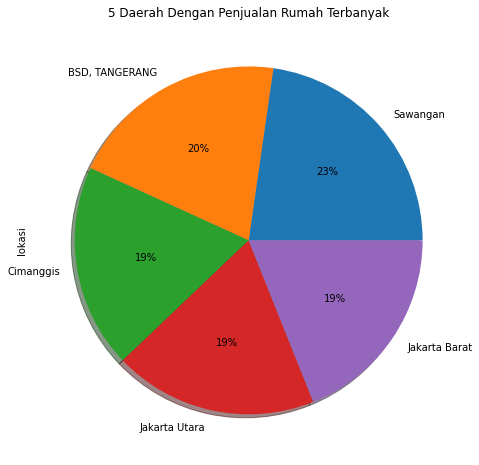

In [ ]:
daerah = data3_baru.groupby(data3_baru['lokasi'])['lokasi'].count().sort_values(ascending = False).head(5)
plt.figure(figsize=(12,8))
plt.subplot()
daerah.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 10)
plt.title("5 Daerah Dengan Penjualan Rumah Terbanyak")

**Grafik diatas menunjukkan persebaran daerah dengan penjualan rumah terbanyak. Berdasarkan diagram dapat disimpulkan:**
Sawangan merupakan daerah yang cenderung memiliki penjualan rumah terbanyak di Depok dibandingkan dengan 4 daerah lainnya yaitu sebanyak 23%, diikuti BSD, Tangerang sebesar 20%, dan 3 wilayah memiliki penjualan rumah dengan persentase sama sebesar 19% meliputi daerah Cimanggis, Jakarta Utara, dan Jakarta Barat.

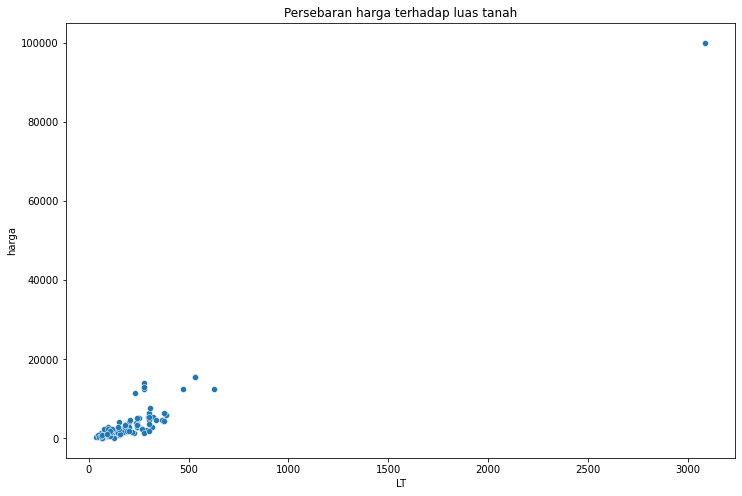

60.0     8
96.0     7
90.0     5
72.0     5
276.0    5
        ..
98.0     1
335.0    1
234.0    1
150.0    1
91.0     1
Name: LT, Length: 63, dtype: int64


In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = data1_baru['LT'], y = data1_baru['harga'])
plt.title('Persebaran harga terhadap luas tanah')
plt.show()
print(data1_baru['LT'].value_counts())

Dari data, kita dapat banyaknya rumah yang dijual pada 3 wilayah dengan range luas tanah dari 36m^2 sampai 500m^2

1.700000e+03    8
6.000000e+02    7
2.500000e+02    6
2.300000e+03    6
4.500000e+09    5
               ..
4.300000e+09    1
2.250000e+09    1
1.050000e+09    1
4.250000e+03    1
1.750000e+03    1
Name: harga, Length: 245, dtype: int64


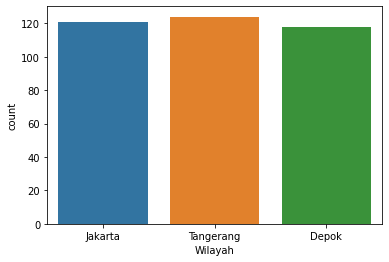

In [ ]:
sns.countplot(x = "Wilayah", data = data3_baru)
print(data3_baru['harga'].value_counts())

**Diagram diatas dapat disimpulkan:** 3 wilayah yaitu Jakarta, Tangerang, dan Depok. Rata-rata harga penjualan rumah berada pada wilayah Tangerang

# **Kesimpulan :**

1. Data yang diberikan perusahaan mengenai data-data penjualan rumah di daerah Depok, Tangerang dan Jakarta masih acak dan berantakan. Sebanyak 118 rumah berada di daerah Depok, daerah Tangerang sebanyak 124 dan daerah Jakarta sebanyak 120 setelah dirapihkan. Tidak ada penambahan data dari luar, namun data tersebut masih belum rapih. Dari data tersebut terdapat beberapa variabel yaitu garasi, carport, lokasi, sertifikat dan listrik yang beberapa tidak terisi.
2. Saran yang bisa diberikan agar mempermudah dalam mengelola data yaitu membuat sistem data agar data yang di masukkan sesuai dengan kolomnya dan berupa jawaban tepat informasinya. Mencari data-data yang memiliki informasi lengkap atau mencarinya dengan jangkauan yang luas agar merata dalam pengisian data dan mempermudah dalam pengelolaan data.

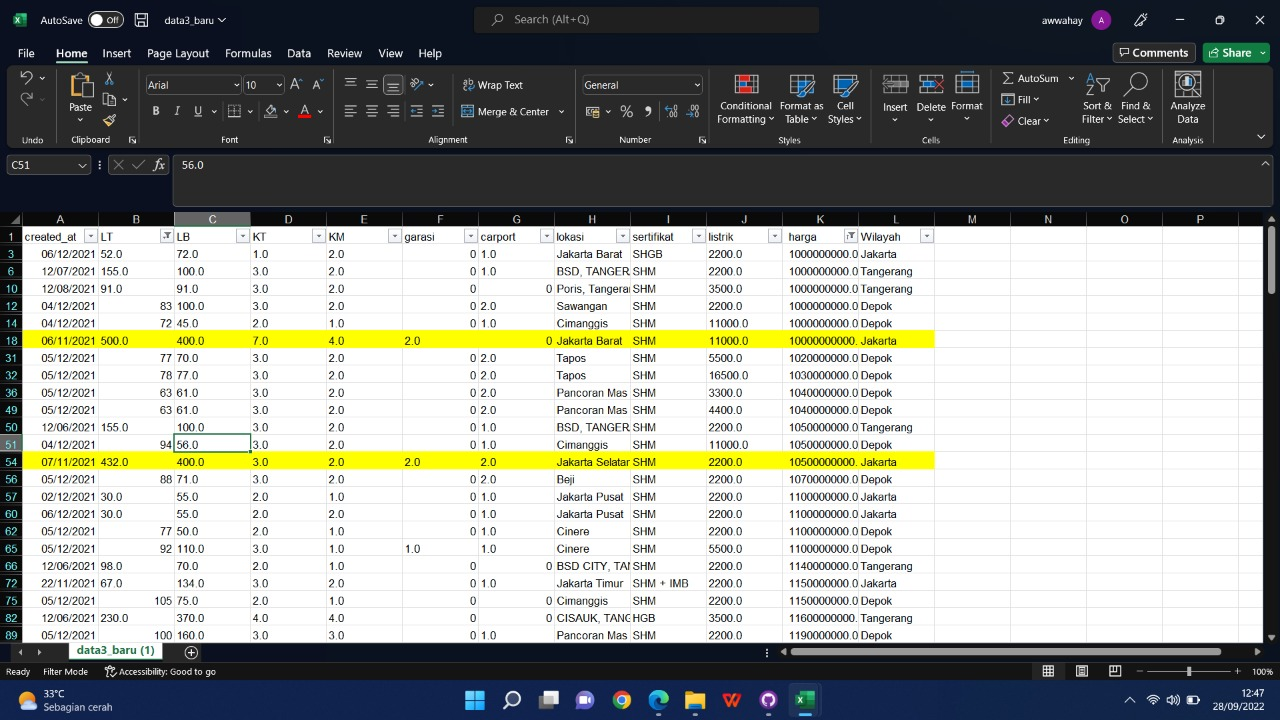

# Rekomendasi : kami rekomendasikan untuk membeli rumah di daerah jakarta selatan dan jakarta barat dengan range harga 1M-1.5M 
karena dilihat dari fasilitas dan perbandingan harganya yang cenderung lebih murah.
      